> This assignment as two parts Section A and B. The first part is the implementation of function required in applying the CNN layers and the next section will be around the use of built in function of Tensorflow



`Before moving ahead as we have reached the stage of applying CNNs. We are going to deal with large number of parameters and hence more computational power. So you will need to connect runtime of collab to GPU: https://www.youtube.com/watch?v=-9CLfrZISRw`

### **BOTH THE SECTION CAN BE SOLVED INDEPENDENTLY** BUT SECTION A has **3X** more weightage than SECTION B doesn't have any code to write.

## **SECTION:A**

In [ ]:
import numpy as np
import scipy as sci
import math

### Q1: Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K. 

- not giving channels right now : assume channels = 1

In [ ]:
def corr2d(X: np.array, K: np.array) -> np.array:

    # no padding for now and assume stride = 1
    #c = (len(X_1d))
    #d = (len(X_2d))
    e = (len(K))
    if np.ndim(K)==2:
      f = (len(K[0]))
    else: f=1
    C = sci.signal.correlate2d(X,K)
    g= (len(C))
    h= (len(C[0]))
    #for j in range(d-f+1):
    print(np.array(C))
    print(C[1:3,1:3])

     # for i in range(c-e+1):
     

    pass


In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
K = np.array([[0.0, 1.0], [2.0, 3.0]], dtype=np.float32)
print(corr2d(X, K)) # example done in class, try to print this and check if you get the right answer

[[ 0.  3.  8.  4.]
 [ 9. 19. 25. 10.]
 [21. 37. 43. 16.]
 [ 6.  7.  8.  0.]]
[[19. 25.]
 [37. 43.]]
None


### now try to make a new function corr2d_multiple_input_channels(X, K) : where each X and K have the same number of channels, both of them are now 3 dimensional numpy arrays, the output should be a 2 dimensional numpy array (output_h, output_w).

- hint : Use the above corr2d function and read about np.stack

In [ ]:
def corr2d_multiple_input_channels(X: np.array, K: np.array) -> np.array: 
    # write a function for this task

SyntaxError: ignored

In [ ]:
new_X = np.stack([X, X+1, X+2], axis=0) # stacking along a new dimension
new_K = np.stack([K, K+1, K+2], axis=0) 

print(f"new_X.shape = {new_X.shape}, new_K.shape = {new_K.shape}")
print(corr2d_multiple_input_channels(new_X, new_K))
# calculate the output by hand and then check whether you get the same answer
# answer should be a 2 dim np array : (output_height, output_width) 

### Write another function corr2d_mutli_in_out(X, K): where X (3 dim np array), K (4 dim numpy array), 0th dimension of K represents the number of kernel/filters we are using. Perform the cross correlation operation for K on X and return the output : 3 dim numpy array whose shape should be (num_output_channels, output_height, output_width)

- hint : use the above corr_2d_mutliple_input_channels(X, K) for each kernel in K and then stack them.

In [ ]:
def corr2d_multi_in_out(X: np.array, K: np.array) -> np.array:
    # X -> (num_in_channels, n_h, n_w)
    # K -> (num_out_channels, num_in_channels, k_h, k_w)
    # output -> (num_out_channels, o_h, o_w)
    

In [ ]:
my_K = np.stack([new_K, new_K+1, new_K+2, new_K + 3], axis=0) 
print(f"my_K.shape = {my_K.shape}")

print(corr2d_multi_in_out(new_X, my_K)) # cross check the calculation

### Q2: What is the computational and statistical benefits of stride larger than 1?? (not more than 20 word answer for each)

Computational:
As stride increases, output has lesser elements therefore lesser computational power is required to get output.

Statistical:
As stride increases, if there are a large no of layers overfitting is prevented.

In [ ]:
print("Computational: As stride increases, output has lesser elements therefore lesser computational power is required to get output.")

print("Statistical: As stride increases, if there are a large no of layers overfitting is prevented.")

### Q3: Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)

- hint : conv_layer(output_channels = 1, input_channels = 1, kerenl_size=(1, 2), bias=False)

In [ ]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

In [ ]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K) 
print(Y)

In [ ]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

### Q4: Complete the following function max_pool2d(X, K) which performs maxpooling with kernel size K on X and returns and two dim numpy array

In [ ]:
def max_pool2d(X: np.array, K: tuple) -> np.array:
  #apply corr2d function then apply np.max sequentially taking m-(h-1),n-(k-1) iterations on 2 nested loops
  
    

In [ ]:
X = np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]], dtype=np.float32)
max_pool2d(X, (2, 2)) # check if the output matches with your calculation

# **SECTION:B**



### **JUST RUN THE CELLS AND VISUALIZE**( Nothing to code 🙂 )

> Indented block



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#importing the dataset
(X_train,Y_train),(X_test,Y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3)

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
# Print shape of all 4 variables: X_train,Y_train,X_test, and Y_test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(35000, 1)
(15000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


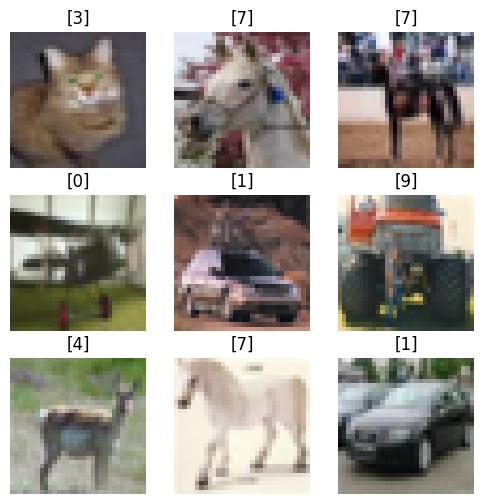

In [ ]:
#Lets visualize the CIFAR-10 dataset

import random
figure = plt.figure(figsize=(6,6))

for i in range(9):
  index = random.randint(0,len(X_train)-1) # showing the index_th image
  
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[index])
  plt.title(Y_train[index])
  plt.axis(False)

In [ ]:
"""
So you can probably notice here that the images are 3D(coloured) but still 
not of great quality ( what can you expect from 32x32 image). Also there are
certain other factors which makes the classification a bit tougher than the 
cases of 2D( the digit and the fashion data) you dealt before. We will try to
understand the difficulties and find probable solution for them.
"""

'\nSo you can probably notice here that the images are 3D(coloured) but still \nnot of great quality ( what can you expect from 32x32 image). Also there are\ncertain other factors which makes the classification a bit tougher than the \ncases of 2D( the digit and the fashion data) you dealt before. We will try to\nunderstand the difficulties and find probable solution for them.\n'

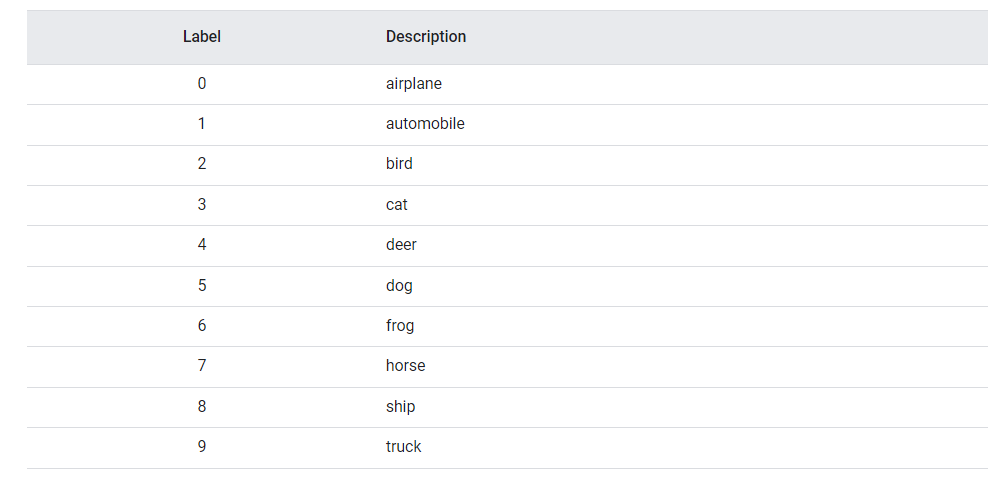

In [ ]:
"""
Lets first start with the CNN model discussed in the class for digit
 classification. Notice that I have changed the input shape for this usecase.
 Earlier it was (28,28,1) for the digit dataset.
"""

'\nLets first start with the CNN model discussed in the class for digit\n classification. Notice that I have changed the input shape for this usecase.\n Earlier it was (28,28,1) for the digit dataset.\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

# adding the 1st layer of CNN
cnn_model.add(tf.keras.layers.Conv2D(26, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#adding another CNN layer
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
"""
Explain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]

Answer:The Adam Optimizer stands for adaptive moment estimation, its main use is to eliminate one of the major problems of standard gradient descent which is variance of the 
          running of the model on the basis of learning rate. In standard gradient descent the efficiency of the model is greatly dependent on the learning rate, if the 
          learning rate is too less then , then the no of epochs required to get desired accuracy would be far too many, therefore the computational power and the time required 
          would be more. Whereas if the learing rate is too high thn we might have gone past the point of maximum accuracy in standard gradient descent.
          Adam is modelled on Stochastic Gradient Descent and finds out adaptive individual learning rates for different layers of the model.
          The Adam optimizer constructs such a function that consists of a no of local minimas before reaching the global minima. We control the rate of gradient descent 
          in such a way that there is minimum fluctuation when the function comes to the global minimum while taking adequate steps as to pass the local minimas 
          along the way. For the Adam optimizer, another term called 'momentum' is relevant, what the momentum algorithm does that it tries accelerating the fall toward the 
          global minima while dampening the oscilltion, hence the Adam optimizer consists of both Standard Gradient Descent and momentum. In terms of results, Adam function gives
          better results than SGD activation functions which is to be expected as it uses an adaptive learning rate while in SGD functions learning rate is fixed.

          ref: geeksforgeeks
                
""" 

'\nExplain what is Adam optimizer below in atleast 250 words.[ read on web and explain ]\n\nAnswer:The Adam Optimizer stands for adaptive moment estimation, its main use is to eliminate one of the major problems of standard gradient descent which is variance of the \n          running of the model on the basis of learning rate. In standard gradient descent the efficiency of the model is greatly dependent on the \n'

### **Make sure that you are connected to GPU runtime other wise the training in next cell is going to take a long time**

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 17s 7ms/step - loss: 2.8569 - accuracy: 0.1006 - val_loss: 2.2902 - val_accuracy: 0.1123
Epoch 2/10
875/875 [==============================] - 4s 5ms/step - loss: 2.1750 - accuracy: 0.1733 - val_loss: 2.0590 - val_accuracy: 0.2160
Epoch 3/10
875/875 [==============================] - 7s 8ms/step - loss: 1.9399 - accuracy: 0.2584 - val_loss: 1.9789 - val_accuracy: 0.2410
Epoch 4/10
875/875 [==============================] - 5s 6ms/step - loss: 1.8764 - accuracy: 0.2846 - val_loss: 1.9416 - val_accuracy: 0.2739
Epoch 5/10
875/875 [==============================] - 7s 8ms/step - loss: 1.8493 - accuracy: 0.2986 - val_loss: 1.9315 - val_accuracy: 0.2749
Epoch 6/10
875/875 [==============================] - 4s 5ms/step - loss: 1.8155 - accuracy: 0.3164 - val_loss: 1.8273 - val_accuracy: 0.3061
Epoch 7/10
875/875 [==============================] - 5s 6ms/step - loss: 1.7852 - accuracy: 0.3333 - val_loss: 1.8055 - val_accuracy: 0.3083
Epoch 8/10
875/8

In [ ]:
""" 
Write about validation accuracy in 100 words.

Answer: When a model is training, then the training accuracy of the model is bound to rise, as the model is being trained on that data only hence, the model trains a 
        better set of weights to better fit the training data. To avoid overfitting, which means if the model works only and only on the training data provided, we use a
        cross validation set which functions as a check to verify the model is working on any set of data provided or is it only working on the training data. Therfore if the 
        accuracy of the model while applied on the validation data is close to the training accuracy, we can say that the model is working correcly on every dataset provided and
        the curve is not overfit to the training data.

        ref: https://stats.stackexchange.com/questions/401696/validation-accuracy-vs-testing-accuracy
"""

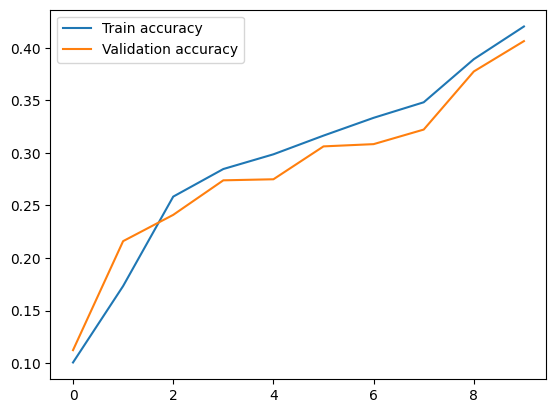

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
What do you think is happening? Is the model training or not?
 You can see that both the training and validation accuracy are
 just roaming around 0.1. 
 One reason for this can be our model architecture. We had 26 filters
 in our first layer and 16 filters in our next layer. This funnel down approach
 works for dense layers but for Conv layers( which are good at feature extraction)
 we want them to extract more and more features.

 So lets change that to funne up --> 16 and 32 in the layers respectively
"""

'\nWhat do you think is happening? Is the model training or not?\n You can see that both the training and validation accuracy are\n just roaming around 0.1. \n One reason for this can be our model architecture. We had 26 filters\n in our first layer and 16 filters in our next layer. This funnel down approach\n works for dense layers but for Conv layers( which are good at feature extraction)\n we want them to extract more and more features.\n\n So lets change that to funne up --> 16 and 32 in the layers respectively\n'

In [ ]:
# model initialization
cnn_model = tf.keras.Sequential()

"""adding the 1st layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(16, (5,5), activation = 'relu', input_shape=(32,32,3)))

# adding a maxpooling
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

"""adding the 2nd layer of CNN(Changed)"""
cnn_model.add(tf.keras.layers.Conv2D(32, (5,5), activation = 'relu'))

# adding another maxpooling layer
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))

#flattening the layer
cnn_model.add(tf.keras.layers.Flatten())

# 20 x 20 x 16
#dense layer
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))

# final layer 
cnn_model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
cnn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


875/875 [==============================] - 6s 5ms/step - loss: 2.7118 - accuracy: 0.1911 - val_loss: 1.9909 - val_accuracy: 0.2751
Epoch 2/20
875/875 [==============================] - 4s 5ms/step - loss: 1.8366 - accuracy: 0.3178 - val_loss: 1.8319 - val_accuracy: 0.3411
Epoch 3/20
875/875 [==============================] - 4s 4ms/step - loss: 1.6675 - accuracy: 0.3900 - val_loss: 1.6686 - val_accuracy: 0.3854
Epoch 4/20
875/875 [==============================] - 4s 4ms/step - loss: 1.5270 - accuracy: 0.4421 - val_loss: 1.4809 - val_accuracy: 0.4643
Epoch 5/20
875/875 [==============================] - 4s 5ms/step - loss: 1.4255 - accuracy: 0.4864 - val_loss: 1.3827 - val_accuracy: 0.5024
Epoch 6/20
875/875 [==============================] - 4s 4ms/step - loss: 1.3603 - accuracy: 0.5162 - val_loss: 1.4542 - val_accuracy: 0.4864
Epoch 7/20
875/875 [==============================] - 4s 4ms/step - loss: 1.2906 - accuracy: 0.5359 - val_loss: 1.3711 - val_accuracy: 0.5159
Epoch 8/20
875/87

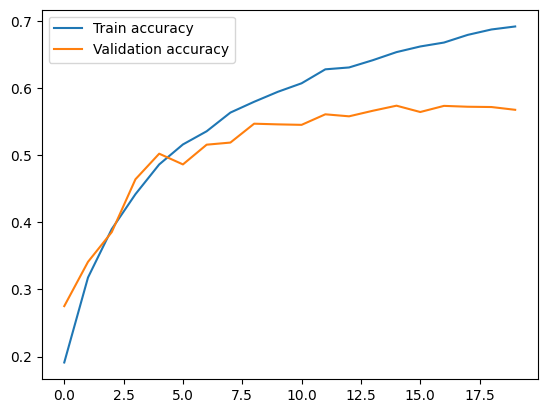

In [ ]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.legend()

In [ ]:
"""
Did our model improved?? 
YES, the model improved greatly.
Are we done with the job?
 No, as we can see the validation accuracy stagnates while the training accuracy continues to rise. This indicates that the model is far from perfection.
What is happening after 5( roughly ) epochs?
 Why is there a gap between training and validation accuracy?
Overfitting of the curve.

Our training accuracy reached to 0.73( and still increasing ) but 
the validation accuracy seems to stagnate at 0.52.

Is our model overfitting on the training data so much that it can't work well 
on unseen data. 
YES
"""

In [ ]:
"""
How are we gonna tackel this problem?
Well, we will see that in next part of this assignment.
Till then lets learn about about overfitting.
"""

> **Well using Chatgpt to answer these question is something which everyone can think of right?? To create a difference write answer in your own terms after reading from web or reading the answer of Chatgpt.**
### **After all this is your midterm evaluation. Cheating is something we can catch easily** ( we have also done this )

In [ ]:
"""
[CLARIFICATION]: Reading and understanding by searching on Chatgpt is not 
considered as cheating as long as you are writing that in your own word
( only problem is the crediblity of its information)

"""

In [ ]:
"""
Question: What is overfitting and underfitting below ( atleast 200 words )

Answer: A model is underfitting when it cannot interpret the basic trend of the data, thereby. It only gives an efficient output on the training data but performs poorly on the
 testing data.  Underfitting damages the accuracy of our machine learning model. Its occurrence simply means that our model does not fit the data well enough. It usually happens 
 when we have less data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the ML model are too easy 
 and flexible to be applied to such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data. Therefore, 
 to summarise, underfitting happens when the model doesn't perform as well on the testing data or even on any new data.

A model is overfitted when the model does not make accurate predictions on testing data. When a model gets trained with excessive data, it starts learning from the noise and 
inaccurate data entries in our data set. And when testing with test data results in high variance. Then the model does not categorize the data correctly, because of too many 
details and noise. The cause of overfitting is more freedom in building the model based on the dataset and therefore they can really build unrealistic models and try to fit 
the training data rather than route the algorithm along the general trend followed by the data. A general indicator of overfitting is if the accuracy of the training data is 
way more accurate than the cross-validation/testing data
"""

In [ ]:
"""
Question: What are regularization techniques in machine learning?(200 words)

Answer: Regularization refers to a set of techniques that help the machine to learn more than just memorise.When a  model is trained and it is able to deliver accurate results on 
training data, but gives relatively poor results on unseen data or test dataset, we can say our model is memorizing more than generalizing. One of the reasons of memorization 
problems could be the overfitting of the n-D curve formed by the model. Therefore the model, memorises the datapoints instead of predicting the trend followed by data. 
Regularization refers to a set of techniques that regularizes learning from particular features for traditional algorithms or neurons in the case of neural network algorithms.
It assigns weights attached to a feature or a neuron such that algorithms do not rely on just a few features or neurons to predict the result.
Regularization works by adding a penalty term to the loss function during the training process. This penalty reduces the probability of the model training on complex data and 
fitting the training data too closely. Thus by regularization we reduce the no of parameters by only considering the most important/relevant ones
"""

In [ ]:
"""
Question: What dropout layer and what does it do?( read it from Tensorflow.org and write in 200 words)

Answer: The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 
are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.In a dropout layer, a dropout rate is specified, indicating the probability of a neuron being 
dropped out. During forward propagation, each neuron in the layer is temporarily "switched off" with a probability equal to the dropout rate. The outputs of the remaining 
neurons are increased so as to equal the sum of weights appropriately. During backpropagation, only the  neurons turned on contribute to the gradient updates, while the  
neurons turned off are considered non existent. This random on and off methodology enables neurons to become more independent, as is in a game of Chinese whisper neurons 
typically blame the next present neuron for the error during backpropogation.
"""

In [ ]:
"""
Question: What is L1 normalization? write its formulae as well( atleast 200 words )

Answer: As we know regularization introduces a penalty term that reduces the no of parameters/features by only keeping the most relevant ones thereby reducing overfitting 
of the training of the data. L1 regression is called lasso regression, wherein lasso stands for Least Absolute Shrinkage and Selection Operator. Lasso regression adds an 
absolute value of magnitude of coefficient as penalty term to the loss. The formula of L1 normalization is summation[(y - summation(K*x))]^2 + lambda*summation(|beta|). 
If the lambda term is 0 then there is no significance of the normalization applied, but if lambda is very very high then penalty is very high, therefore the irrelevant 
parameters have their effect reduced to 0. Therefore, L1 regularization is the go-to method to reduce the number of parameters.
"""

In [ ]:
"""
Question: What is L2 normalization? write its formulae as well( atleast 200 words )

Answer: As we know regularization introduces a penalty term that reduces the no of parameters/features by only keeping the most relevant ones thereby reducing overfitting 
of the training of the data. The Regression model that uses L2 regularization is called Ridge Regression.

The formula of L2 normalization is summation[(y - summation(K*x))]^2 + lambda*summation((beta)^2)
Regularization adds the penalty as model complexity increases. The regularization parameter (lambda) penalizes all the parameters except biases applied at each layer which is
independent in the formula so that the model generalizes the data and won’t overfit. Ridge regression adds squared value of coefficient as penalty term to the loss function. 
If lambda is zero, then there is no change in the curve of the function, therefore no regularization occurs. But if the lambda is very large, then the weights of the parameters
would tend to zero, thereby leading no effect of the given parameters if the no of epochs is less. This leads to an underfitting model. But, in some cases this might be a postive
thing as by reducing the weights of some paramters with little effect, we can eliminate the redundant parameters in a overfit curve, leading to a decrease in noise and a better 
fit in data. Also the weights are adjusted in such a way that the sum of weights still remain the same to not corrupt the dataset.



"""

In [ ]:
"""
Question: What is data augmentation techniques and why is it needed in machine learning?( atleast 200 words )

Answer: Data Augmentation is a methodlogy of training an ML model used to increase the data by slightly modifying the pre-existing data or create some new data modelled on the 
        data. It helps to smooth out the ML model, helps in generating a superior dataset and Data augmentation can be utilized to address both requirements; the amount of data 
        and the variety of the training data needed to create a functioning machine learning model.
        A machine learning model performs better and is more accurate when the dataset is vast and based on a underlying trend. By creating fresh and varied cases 
        to train datasets, data augmentation can help improve the performance and results of machine learning models.
        Data collection and labeling is time-consuming and costly for machine learning models. Companies can lower these operational costs by 
        transforming datasets using data augmentation techniques.






"""